# DL2Vec

In [1]:
import sys
sys.path.append("../../../")

import torch as th
#import logging

from mowl.datasets.ppi_yeast import PPIYeastSlimDataset

from mowl.embeddings.graph_based.dl2vec.model import DL2Vec
from gensim.models import Word2Vec
import pickle as pkl
import numpy as np
from MulticoreTSNE import MulticoreTSNE as TSNE
import matplotlib.pyplot as plt


#logging.basicConfig(level=logging.DEBUG)

## DL2Vec

## DL2Vec with Deepwalk

In [2]:
dataset = PPIYeastSlimDataset()
    
model = DL2Vec(
    dataset, 
    "data/dl2vec_deepwalk", 
    bidirectional_taxonomy=True,
    walking_method = "deepwalk",
    walk_length=50, 
    vector_size = 100,
    num_walks=1, 
    alpha=0,
    window=5,
    num_procs = 16
)

In [3]:
model.train()

INFO:root:Generating graph from ontology...
INFO:root:Finished graph generation
INFO:root:Generating random walks...
INFO:root:Walks generated
INFO:root:Starting to train the Word2Vec model
INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #10000, processed 124502 words, keeping 10668 word types
INFO:gensim.models.word2vec:collected 11020 word types from a corpus of 136596 raw words and 11020 sentences
INFO:gensim.models.word2vec:Loading a fresh vocabulary
INFO:gensim.models.word2vec:effective_min_count=1 retains 11020 unique words (100% of original 11020, drops 0)
INFO:gensim.models.word2vec:effective_min_count=1 leaves 136596 word corpus (100% of original 136596, drops 0)
INFO:gensim.models.word2vec:deleting the raw counts dictionary of 11020 items
INFO:gensim.models.word2vec:sample=0.001 downsamples 25 most-common words
INFO:

In [4]:
word2VecModel = Word2Vec.load("data/dl2vec_deepwalk")

INFO:gensim.utils:loading Word2Vec object from data/dl2vec_deepwalk
INFO:gensim.utils:loading wv recursively from data/dl2vec_deepwalk.wv.* with mmap=None
INFO:gensim.utils:setting ignored attribute vectors_norm to None
INFO:gensim.utils:loading vocabulary recursively from data/dl2vec_deepwalk.vocabulary.* with mmap=None
INFO:gensim.utils:loading trainables recursively from data/dl2vec_deepwalk.trainables.* with mmap=None
INFO:gensim.utils:setting ignored attribute cum_table to None
INFO:gensim.utils:loaded data/dl2vec_deepwalk


In [5]:
vectors = word2VecModel.wv

In [6]:
dl2vec_deepwalk_embeddings = {}
for node in model.entities:
    if node.startswith("4932"):
        dl2vec_deepwalk_embeddings[node] = vectors[node]
        
with open("data/protDl2vecD_emb", "wb") as file:
    pkl.dump(dl2vec_deepwalk_embeddings, file)

In [8]:
ec_numbers = {}
with open('data/yeast_ec.tab') as f:
    next(f)
    for line in f:
        it = line.strip().split('\t', -1)
        if len(it) < 5:
            continue
        if it[3]:
            prot_id = it[3].split(';')[0]
            prot_id = '{0}'.format(prot_id)    
            ec_numbers[prot_id] = it[4]

In [8]:
ec_dict = {}
for prot in ec_numbers:
    if prot in dl2vec_deepwalk_embeddings:
        ec_dict[prot] = dl2vec_deepwalk_embeddings[prot]
        
size = model.vector_size
embeds = np.zeros((len(ec_dict), size), dtype=np.float32)

for i, emb in enumerate(ec_dict.values()):
    embeds[i, :] = emb
nodemap = {}
for i, m in enumerate(ec_dict.keys()):
    nodemap[i] = m
    

X = TSNE(n_components=2, verbose=1, n_iter=5000, n_jobs=8).fit_transform(embeds)

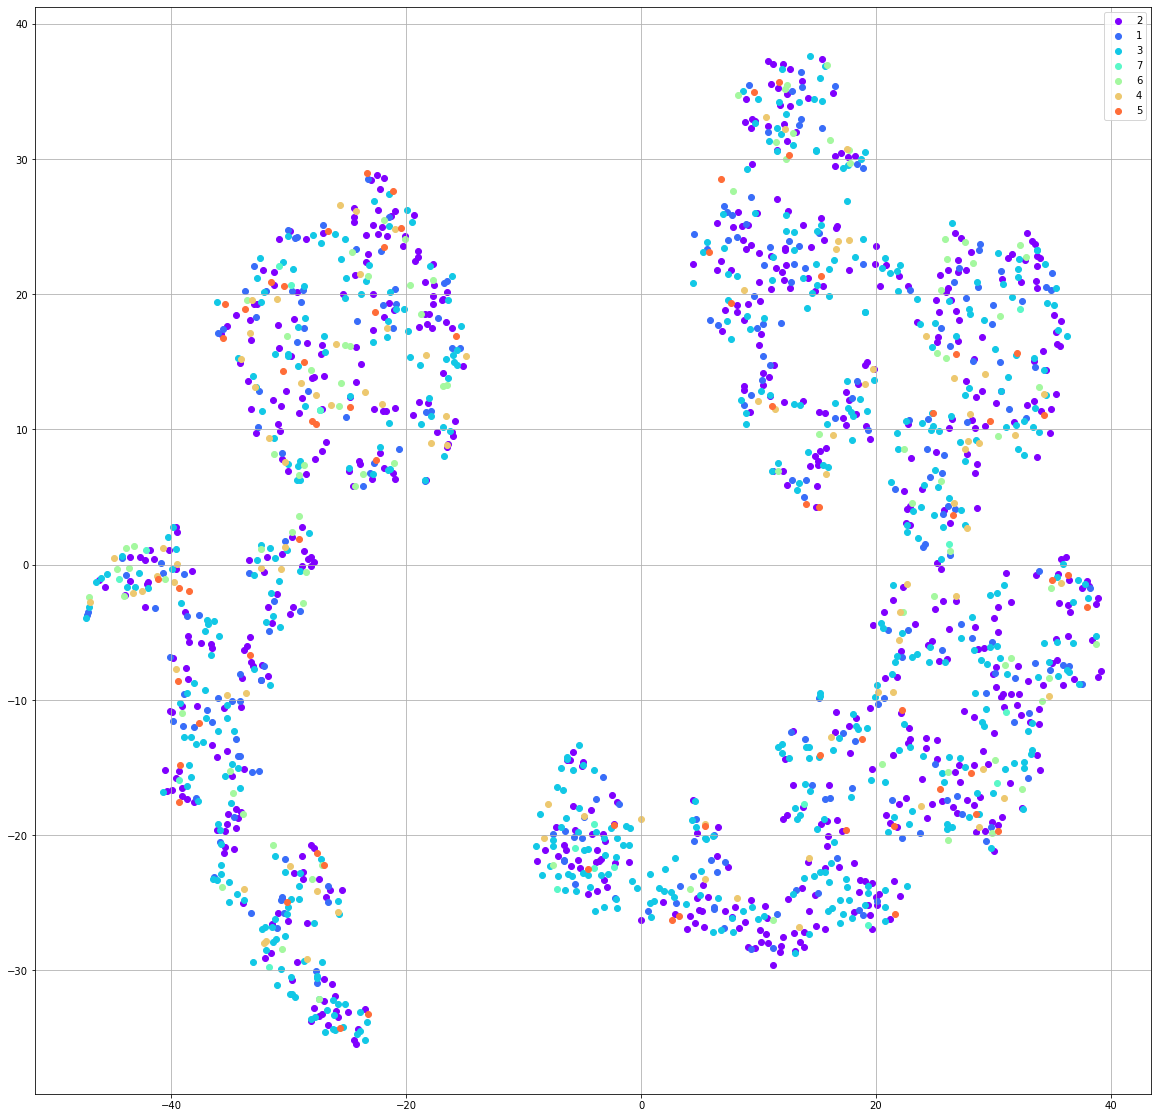

In [9]:
classes = {'0': [[], []]}
for item in nodemap.items():
    k, v = item
    if v in ec_numbers:
        ec = ec_numbers[v].split('.')[0]
        if ec not in classes:
            classes[ec] = [[], []]
        classes[ec][0].append(X[k, 0])
        classes[ec][1].append(X[k, 1])
        
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(classes))))
fig, ax = plt.subplots(figsize=(20, 20))

for ec, items in classes.items():
    if ec == '0':
        continue
    color = next(colors)
    ax.scatter(items[0], items[1], color=color, label=ec)

ax.legend()
ax.grid(True)
plt.savefig('data/fig_dl2vec_deepwalk.jpg')
plt.show()

## DL2Vec with Node2Vec

In [4]:
dataset = PPIYeastSlimDataset()
    
model = DL2Vec(
    dataset, 
    "data/dl2vec_node2vec", 
    bidirectional_taxonomy=True,
    walking_method = "node2vec",
    walk_length=50, 
    vector_size = 100,
    num_walks=5, 
    p = 10,
    q = 0.1,
    window=5,
    num_procs = 16
)

In [5]:
model.train()

INFO:root:Generating graph from ontology...
INFO:root:Finished graph generation
INFO:root:Generating random walks...
INFO:root:Walks generated
INFO:root:Starting to train the Word2Vec model
INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #10000, processed 500000 words, keeping 10654 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #20000, processed 1000000 words, keeping 11020 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #30000, processed 1500000 words, keeping 11020 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #40000, processed 2000000 words, keeping 11020 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #50000, processed 2500000 words, keeping 11020 word types
INFO:gensim.models.word2vec:collected 11020 word types from a corpus of 2755000 raw words and 55100 sentences
I

INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 14 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 13 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 12 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 11 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 10 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 9 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 8 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 7 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 6 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 5 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 4 more threads
INFO:

In [6]:
word2VecModel = Word2Vec.load("data/dl2vec_node2vec")
vectors = word2VecModel.wv

dl2vec_node2vec_embeddings = {}
for node in model.entities:
    if node.startswith("4932"):
        dl2vec_node2vec_embeddings[node] = vectors[node]
        
with open("data/protDl2vecN_emb", "wb") as file:
    pkl.dump(dl2vec_node2vec_embeddings, file)

INFO:gensim.utils:loading Word2Vec object from data/dl2vec_node2vec
INFO:gensim.utils:loading wv recursively from data/dl2vec_node2vec.wv.* with mmap=None
INFO:gensim.utils:setting ignored attribute vectors_norm to None
INFO:gensim.utils:loading vocabulary recursively from data/dl2vec_node2vec.vocabulary.* with mmap=None
INFO:gensim.utils:loading trainables recursively from data/dl2vec_node2vec.trainables.* with mmap=None
INFO:gensim.utils:setting ignored attribute cum_table to None
INFO:gensim.utils:loaded data/dl2vec_node2vec


In [9]:
ec_dict = {}
for prot in ec_numbers:
    if prot in dl2vec_node2vec_embeddings:
        ec_dict[prot] = dl2vec_node2vec_embeddings[prot]
        
size = model.vector_size
embeds = np.zeros((len(ec_dict), size), dtype=np.float32)

for i, emb in enumerate(ec_dict.values()):
    embeds[i, :] = emb
nodemap = {}
for i, m in enumerate(ec_dict.keys()):
    nodemap[i] = m
    

XN = TSNE(n_components=2, verbose=1, n_iter=5000, n_jobs=8).fit_transform(embeds)

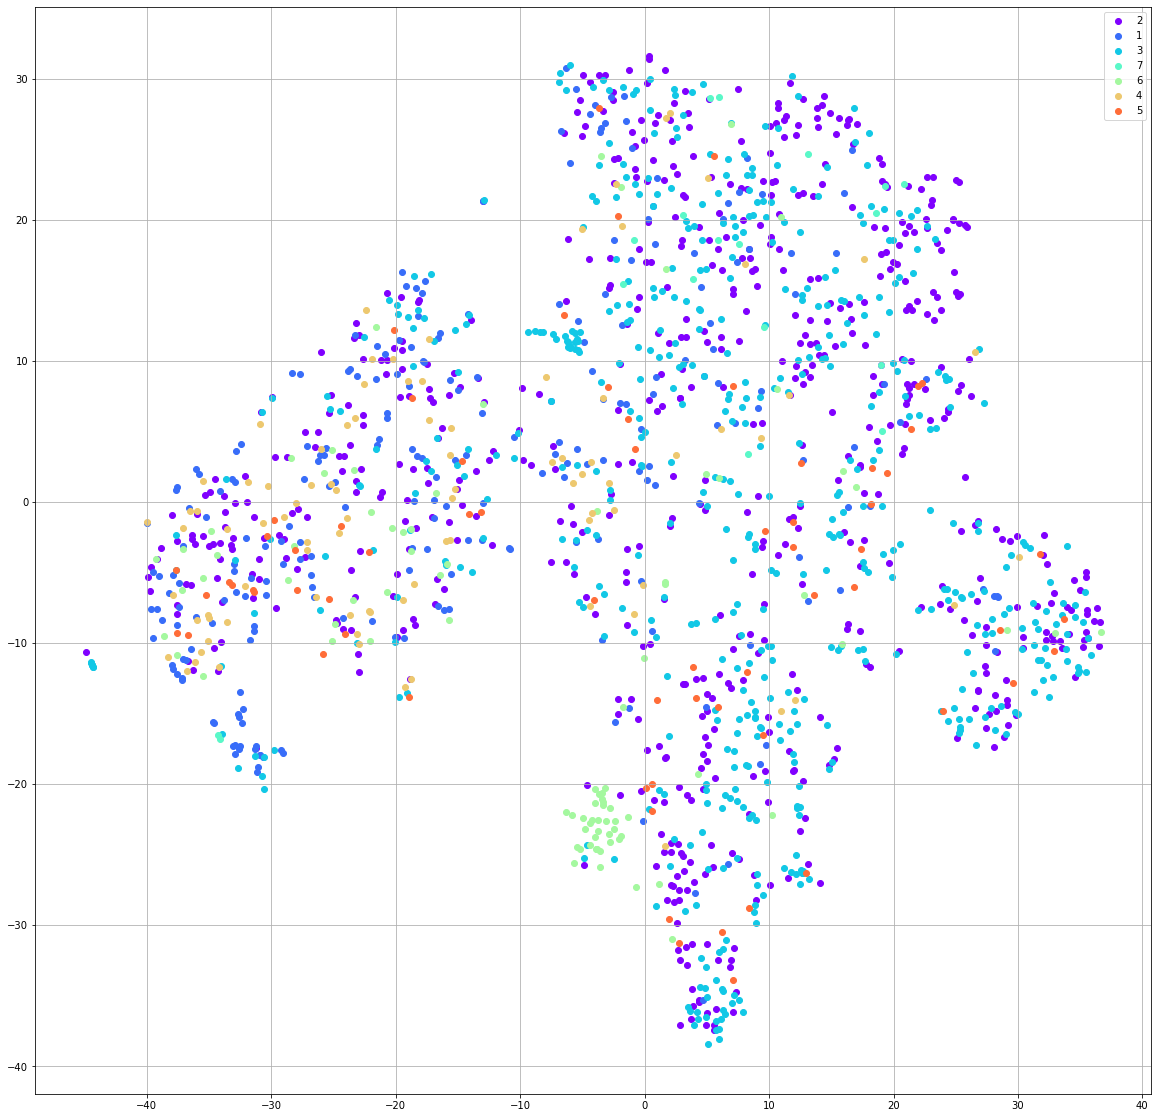

In [10]:
classes = {'0': [[], []]}
for item in nodemap.items():
    k, v = item
    if v in ec_numbers:
        ec = ec_numbers[v].split('.')[0]
        if ec not in classes:
            classes[ec] = [[], []]
        classes[ec][0].append(XN[k, 0])
        classes[ec][1].append(XN[k, 1])
        
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(classes))))
fig, ax = plt.subplots(figsize=(20, 20))

for ec, items in classes.items():
    if ec == '0':
        continue
    color = next(colors)
    ax.scatter(items[0], items[1], color=color, label=ec)

ax.legend()
ax.grid(True)
plt.savefig('data/fig_dl2vec_node2vec.jpg')

plt.show()